In [1]:
%matplotlib inline
import seaborn
import numpy as np
import scipy
import matplotlib.pyplot as plt
import IPython.display as ipd
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (13, 5)

[&larr; Back to Index](index.html)

# Understanding Audio Features through Sonification

In this exercise notebook, we will segment, feature extract, and analyze audio files. Goals:

1. Detect onsets in an audio signal.
2. Segment the audio signal at each onset.
3. Compute features for each segment.
4. Gain intuition into the features by listening to each segment separately.

## Step 1: Retrieve Audio

Load the audio file `simple_loop.wav` into an array.

In [2]:
x, sr = librosa.load('audio/simple_loop.wav')

Show the sample rate:

In [3]:
print(sr)

22050


Listen to the audio signal.

In [4]:
ipd.Audio(x, rate=sr)

Display the audio signal.

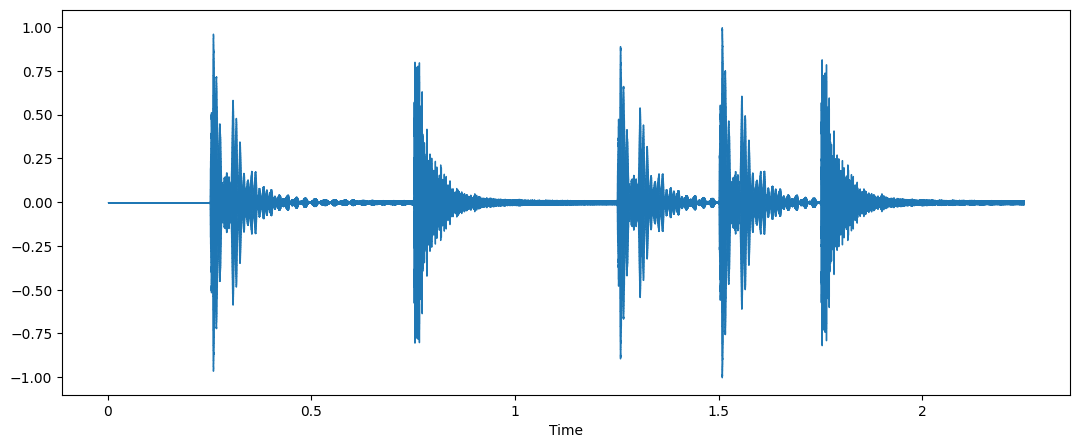

In [5]:
librosa.display.waveshow(x, sr=sr);

Compute the short-time Fourier transform:

In [6]:
X = librosa.stft(x)

For display purposes, compute the log amplitude of the STFT:

In [7]:
Xmag = librosa.amplitude_to_db(np.abs(X))

Display the spectrogram.

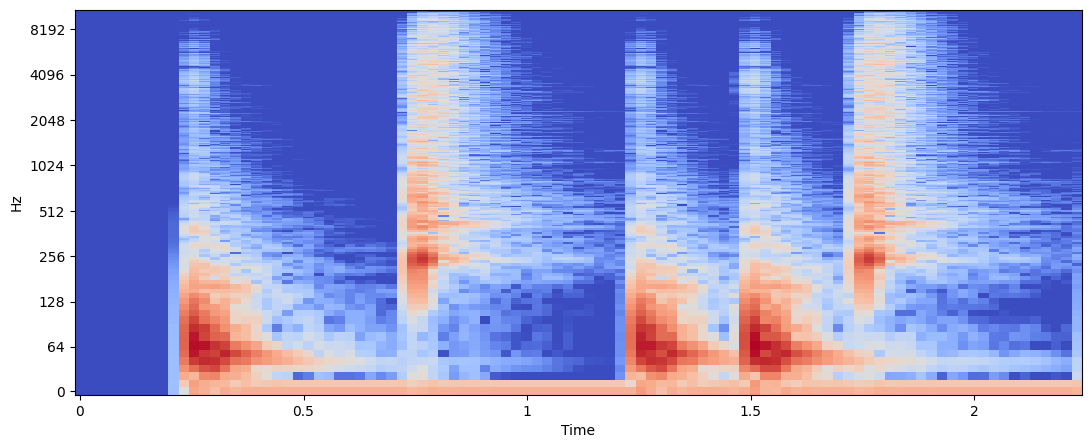

In [8]:
# Play with the parameters, including x_axis and y_axis
librosa.display.specshow(Xmag, sr=sr, x_axis='time', y_axis='log');

## Step 2: Detect Onsets

Find the times, in seconds, when onsets occur in the audio signal.

In [9]:
onset_frames = librosa.onset.onset_detect(y=x, sr=sr)
print(onset_frames)

[12 33 55 66 76]


In [10]:
onset_times = librosa.frames_to_time(frames=onset_frames, sr=sr)
print(onset_times)

[0.27863946 0.7662585  1.27709751 1.53251701 1.76471655]


Convert the onset frames into sample indices.

In [11]:
onset_samples = librosa.frames_to_samples(frames=onset_frames)
print(onset_samples)

[ 6144 16896 28160 33792 38912]


Play a "beep" at each onset.

In [12]:
# Use the `length` parameter so the click track is the same length as the original signal
clicks = librosa.clicks(times=onset_times, length=len(x))

In [13]:
# Play the click track "added to" the original signal
ipd.Audio(x+clicks, rate=sr)

## Step 3: Segment the Audio

Save into an array, `segments`, 100-ms segments beginning at each onset.

In [14]:
frame_sz = int(0.100*sr)
segments = np.array([x[i:i+frame_sz] for i in onset_samples])

Here is a function that adds 300 ms of silence onto the end of each segment and concatenates them into one signal.

Later, we will use this function to listen to each segment, perhaps sorted in a different order.

In [15]:
def concatenate_segments(segments, sr=22050, pad_time=0.300):
    padded_segments = [np.concatenate([segment, np.zeros(int(pad_time*sr))]) for segment in segments]
    return np.concatenate(padded_segments)

In [16]:
concatenated_signal = concatenate_segments(segments, sr)

Listen to the newly concatenated signal.

In [17]:
ipd.Audio(concatenated_signal, rate=sr)

## Step 4: Extract Features

For each segment, compute the zero crossing rate.

In [18]:
zcrs = [sum(librosa.core.zero_crossings(segment)) for segment in segments]
print(zcrs)

[11, 570, 11, 10, 568]


Use `argsort` to find an index array, `ind`, such that `segments[ind]` is sorted by zero crossing rate.

In [19]:
ind = np.argsort(zcrs)
print(ind)

[3 0 2 4 1]


Sort the segments by zero crossing rate, and concatenate the sorted segments.

In [20]:
concatenated_signal = concatenate_segments(segments[ind], sr)

## Step 5: Listen to Segments

Listen to the sorted segments. What do you hear?

In [21]:
ipd.Audio(concatenated_signal, rate=sr)

## More Exercises

Repeat the steps above using other features from [`librosa.feature`](https://librosa.github.io/librosa/feature.html), e.g. `rmse`, `spectral_centroid`, `spectral_bandwidth`.

Repeat the steps above for other audio files:

In [22]:
ls audio

125_bounce.wav                  jangle_pop.mp3
58bpm.wav                       latin_groove.mp3
README.md                       oboe_c6.wav
brahms_hungarian_dance_5.mp3    prelude_cmaj.wav
busta_rhymes_hits_for_days.mp3  simple_loop.wav
c_strum.wav                     simple_piano.wav
clarinet_c6.wav                 sir_duke_piano_fast.mp3
classic_rock_beat.mp3           sir_duke_piano_slow.mp3
classic_rock_beat.wav           sir_duke_trumpet_fast.mp3
conga_groove.wav                sir_duke_trumpet_slow.mp3
cowbell.wav                     thx_original.mp3
drum_samples/                   tone_440.wav
funk_groove.mp3


[&larr; Back to Index](index.html)